# Dataset link:
### https://ftp.ncbi.nlm.nih.gov/genomes/MapView/Canis_lupus_familiaris/objects/BUILD.3.1/initial_release/org_transcript.q.gz

In [407]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data Identification

In [408]:
df = pd.read_csv('/kaggle/input/gfbn-dgdhbs/org_transcript.q.csv')
df.head(5)

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,#tax_id,rna_accession,rna_gi,unigene_id,bases,cds_start,cds_stop,source_db,is_EST,is_RefSeq,strain
0,9615,AB004268.1,GI:2190013,Cfa.15290,1631,53.0,1555.0,mrna,N,NaN,NaN
1,9615,AB006421.3,GI:11034715,Cfa.3470,2115,1.0,2115.0,mrna,N,NaN,NaN
2,9615,AB008451.1,GI:2575866,Cfa.3747,3780,1.0,3780.0,mrna,N,NaN,NaN
3,9615,AB008467.1,GI:3702694,Cfa.44716,2908,285.0,2882.0,mrna,N,NaN,NaN
4,9615,AB008468.1,GI:3702696,Cfa.44716,4232,118.0,2619.0,mrna,N,NaN,NaN


In [409]:
x= pd.Series(df['unigene_id'].values).unique()
print (x)
print (len(x))

['Cfa.15290' 'Cfa.3470' 'Cfa.3747' ... 'Cfa.162' 'Cfa.44523' 'Cfa.769']
22821


In [410]:
df.index = np.arange(0,len(df['cds_stop']))
df

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,#tax_id,rna_accession,rna_gi,unigene_id,bases,cds_start,cds_stop,source_db,is_EST,is_RefSeq,strain
0,9615,AB004268.1,GI:2190013,Cfa.15290,1631,53.0,1555.0,mrna,N,NaN,NaN
1,9615,AB006421.3,GI:11034715,Cfa.3470,2115,1.0,2115.0,mrna,N,NaN,NaN
2,9615,AB008451.1,GI:2575866,Cfa.3747,3780,1.0,3780.0,mrna,N,NaN,NaN
3,9615,AB008467.1,GI:3702694,Cfa.44716,2908,285.0,2882.0,mrna,N,NaN,NaN
4,9615,AB008468.1,GI:3702696,Cfa.44716,4232,118.0,2619.0,mrna,N,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
326283,9615,Z97817.1,GI:2266596,NaN,465,NaN,NaN,est,Y,NaN,NaN
326284,9615,Z97818.1,GI:2266597,Cfa.10758,320,NaN,NaN,est,Y,NaN,NaN
326285,9615,Z97821.1,GI:2266600,Cfa.769,483,NaN,NaN,est,Y,NaN,NaN
326286,9615,Z97822.1,GI:2266601,NaN,487,NaN,NaN,est,Y,NaN,NaN


# Perform Data Cleaning

## drop null columns

In [411]:
df = df.drop(['strain','is_RefSeq','rna_gi','#tax_id'],axis=1)
df

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,rna_accession,unigene_id,bases,cds_start,cds_stop,source_db,is_EST
0,AB004268.1,Cfa.15290,1631,53.0,1555.0,mrna,N
1,AB006421.3,Cfa.3470,2115,1.0,2115.0,mrna,N
2,AB008451.1,Cfa.3747,3780,1.0,3780.0,mrna,N
3,AB008467.1,Cfa.44716,2908,285.0,2882.0,mrna,N
4,AB008468.1,Cfa.44716,4232,118.0,2619.0,mrna,N
...,...,...,...,...,...,...,...
326283,Z97817.1,NaN,465,NaN,NaN,est,Y
326284,Z97818.1,Cfa.10758,320,NaN,NaN,est,Y
326285,Z97821.1,Cfa.769,483,NaN,NaN,est,Y
326286,Z97822.1,NaN,487,NaN,NaN,est,Y


In [412]:
df

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,rna_accession,unigene_id,bases,cds_start,cds_stop,source_db,is_EST
0,AB004268.1,Cfa.15290,1631,53.0,1555.0,mrna,N
1,AB006421.3,Cfa.3470,2115,1.0,2115.0,mrna,N
2,AB008451.1,Cfa.3747,3780,1.0,3780.0,mrna,N
3,AB008467.1,Cfa.44716,2908,285.0,2882.0,mrna,N
4,AB008468.1,Cfa.44716,4232,118.0,2619.0,mrna,N
...,...,...,...,...,...,...,...
326283,Z97817.1,NaN,465,NaN,NaN,est,Y
326284,Z97818.1,Cfa.10758,320,NaN,NaN,est,Y
326285,Z97821.1,Cfa.769,483,NaN,NaN,est,Y
326286,Z97822.1,NaN,487,NaN,NaN,est,Y


## Assess the columns for intactness%

In [413]:
for col_nm in df.columns:
    print(f'{col_nm} has {len(df[df[col_nm].isnull()][col_nm])} nulls ({len(df[df[col_nm].isnull()][col_nm])/len(df[col_nm])*100:0.5f}%), dtype = {df[col_nm].dtype}')
    print()

rna_accession has 0 nulls (0.00000%), dtype = object

unigene_id has 52202 nulls (15.99875%), dtype = object

bases has 0 nulls (0.00000%), dtype = int64

cds_start has 324094 nulls (99.32759%), dtype = float64

cds_stop has 324094 nulls (99.32759%), dtype = float64

source_db has 1336 nulls (0.40945%), dtype = object

is_EST has 0 nulls (0.00000%), dtype = object



In [414]:
df.dropna(subset=['source_db','unigene_id'],inplace = True)
df

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,rna_accession,unigene_id,bases,cds_start,cds_stop,source_db,is_EST
0,AB004268.1,Cfa.15290,1631,53.0,1555.0,mrna,N
1,AB006421.3,Cfa.3470,2115,1.0,2115.0,mrna,N
2,AB008451.1,Cfa.3747,3780,1.0,3780.0,mrna,N
3,AB008467.1,Cfa.44716,2908,285.0,2882.0,mrna,N
4,AB008468.1,Cfa.44716,4232,118.0,2619.0,mrna,N
...,...,...,...,...,...,...,...
326278,Z97810.1,Cfa.7387,313,NaN,NaN,est,Y
326279,Z97812.1,Cfa.10758,355,NaN,NaN,est,Y
326281,Z97815.1,Cfa.769,483,NaN,NaN,est,Y
326284,Z97818.1,Cfa.10758,320,NaN,NaN,est,Y


In [415]:
df = df.drop(columns=['cds_start','cds_stop'])
df

,rna_accession,unigene_id,bases,source_db,is_EST
0,AB004268.1,Cfa.15290,1631,mrna,N
1,AB006421.3,Cfa.3470,2115,mrna,N
2,AB008451.1,Cfa.3747,3780,mrna,N
3,AB008467.1,Cfa.44716,2908,mrna,N
4,AB008468.1,Cfa.44716,4232,mrna,N
...,...,...,...,...,...
326278,Z97810.1,Cfa.7387,313,est,Y
326279,Z97812.1,Cfa.10758,355,est,Y
326281,Z97815.1,Cfa.769,483,est,Y
326284,Z97818.1,Cfa.10758,320,est,Y


## Scan for sus anomalies

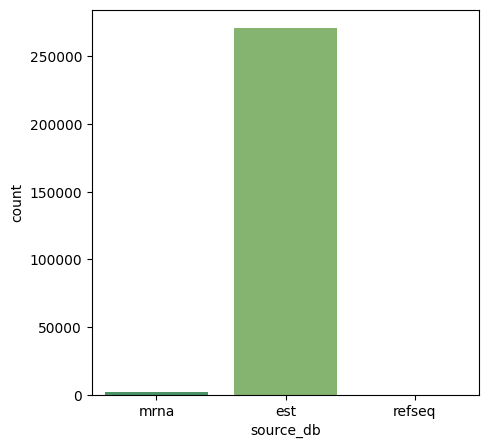

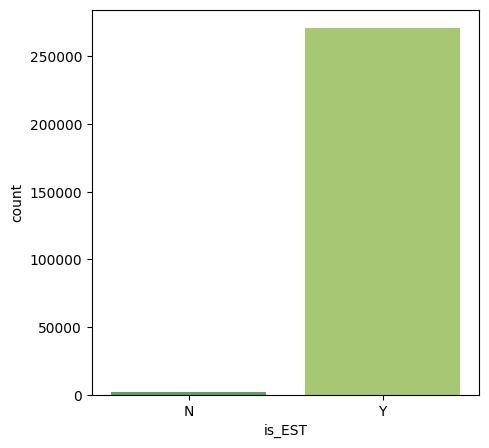

In [416]:
for i in df.columns:    
    if(len(pd.Series(df[i].values).unique())<=100):
        plt.figure(figsize =(5,5))
        sns.countplot(x=i,data=df, palette ='summer')
        plt.xlabel(i)

In [417]:
df['is_EST'].value_counts()

is_EST
Y    271032
N      2071
Name: count, dtype: int64

In [418]:
df[(df['is_EST']=='N')& (df['source_db']!='mrna')].value_counts()

rna_accession   unigene_id  bases  source_db  is_EST
NM_001007131.1  Cfa.155     1286   refseq     N         1
Name: count, dtype: int64

In [419]:
df[(df['is_EST']=='N')& (df['source_db']=='mrna')].value_counts()

rna_accession  unigene_id  bases  source_db  is_EST
Z81018.1       Cfa.3749    1531   mrna       N         1
AB004268.1     Cfa.15290   1631   mrna       N         1
AB006421.3     Cfa.3470    2115   mrna       N         1
AB008451.1     Cfa.3747    3780   mrna       N         1
AB008467.1     Cfa.44716   2908   mrna       N         1
                                                      ..
AB031064.1     Cfa.3649    539    mrna       N         1
AB031276.1     Cfa.702     1469   mrna       N         1
AB032025.1     Cfa.24507   514    mrna       N         1
AB035079.1     Cfa.3594    742    mrna       N         1
AB035080.1     Cfa.3507    1196   mrna       N         1
Name: count, Length: 2070, dtype: int64

In [420]:
df[(df['is_EST']!='N')& (df['source_db']=='mrna')].value_counts()

Series([], Name: count, dtype: int64)

## Drop the leakage dummy "is_EST" column
#### is_EST is ~= one to one with (source_db not mrna)

In [421]:
df = df.drop(columns='is_EST')

# Scanning the other features for imbalance or skewnesss

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


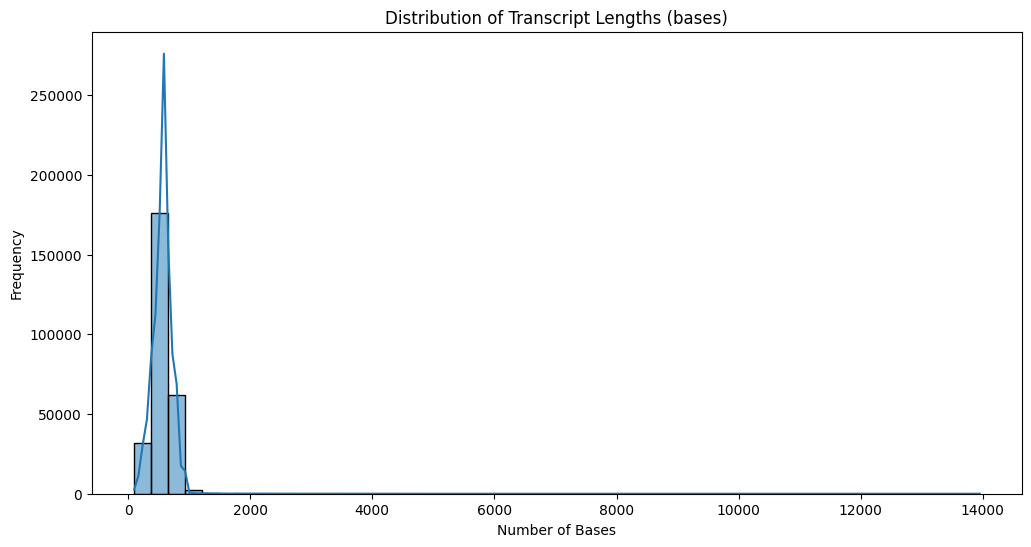

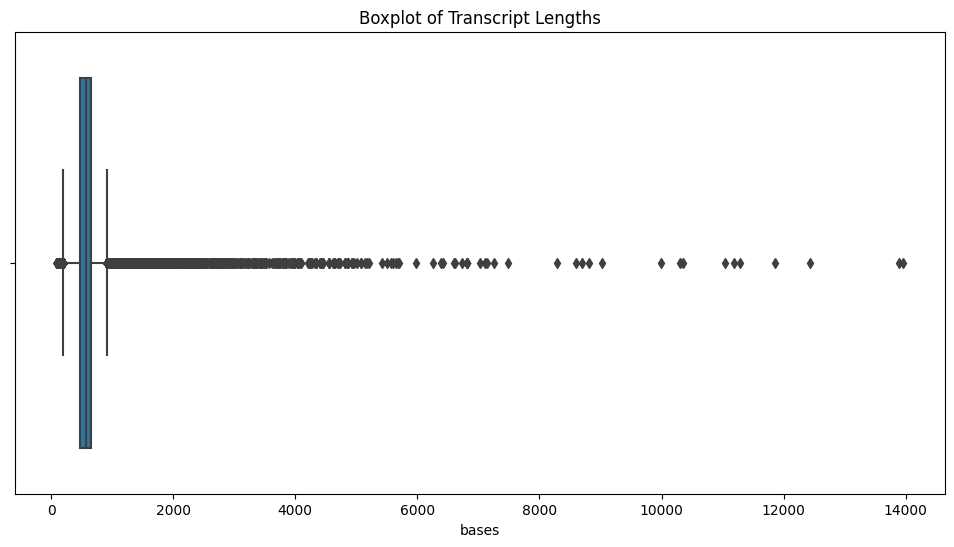

count    273103.000000
mean        564.061867
std         202.115024
min         100.000000
25%         469.000000
50%         570.000000
75%         648.000000
max       13947.000000
Name: bases, dtype: float64


In [422]:
plt.figure(figsize=(12, 6))
sns.histplot(df['bases'], bins=50, kde=True)
plt.title('Distribution of Transcript Lengths (bases)')
plt.xlabel('Number of Bases')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x=df['bases'])
plt.title('Boxplot of Transcript Lengths')
plt.show()

print(df['bases'].describe())

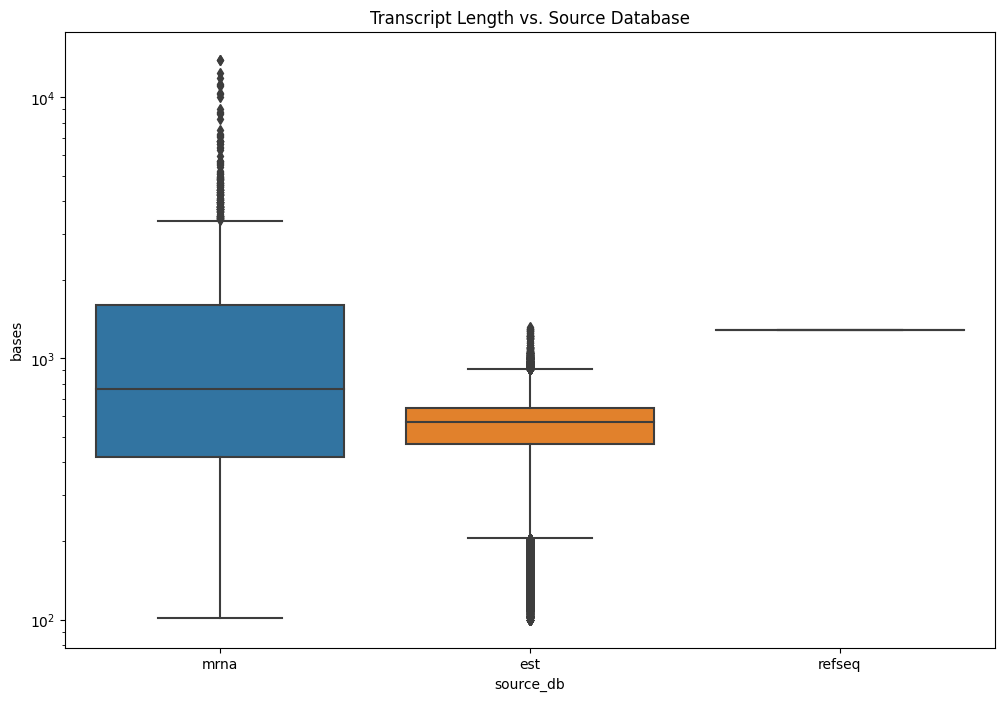

In [423]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='source_db', y='bases', data=df)
plt.title('Transcript Length vs. Source Database')
plt.yscale('log')
plt.show()

Top 10 Genes with the Most Transcripts:
unigene_id
Cfa.40783    2976
Cfa.39069    2388
Cfa.39173    1931
Cfa.44524    1546
Cfa.40445    1450
Cfa.39098    1429
Cfa.43671    1355
Cfa.1482     1328
Cfa.4389     1169
Cfa.46256    1109
Name: rna_accession, dtype: int64


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


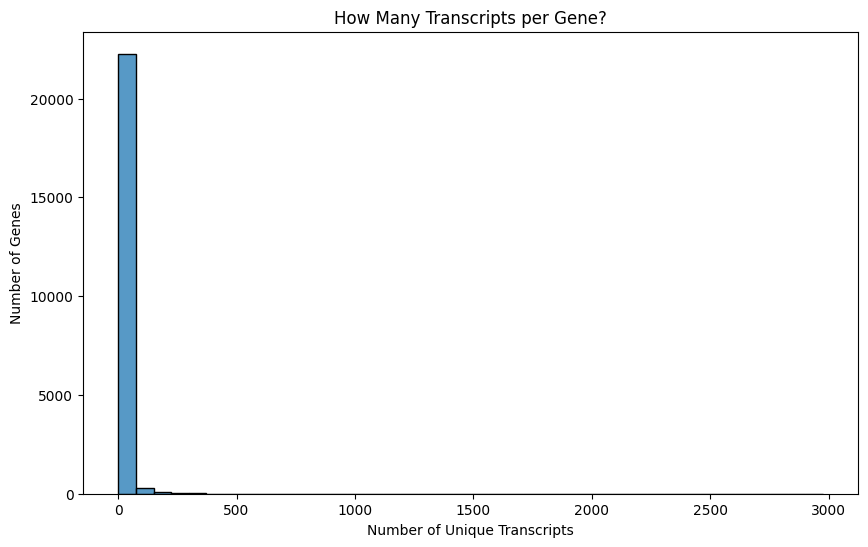

In [424]:
transcript_counts = df.groupby('unigene_id')['rna_accession'].nunique().sort_values(ascending=False)

print("Top 10 Genes with the Most Transcripts:")
print(transcript_counts.head(10))

plt.figure(figsize=(10, 6))
sns.histplot(transcript_counts, bins=40)
plt.title('How Many Transcripts per Gene?')
plt.xlabel('Number of Unique Transcripts')
plt.ylabel('Number of Genes')
plt.show()

# Feature Engineer new column for no. transcripts per gene

In [425]:
df['transcripts'] = df.groupby('unigene_id')['rna_accession'].transform('nunique')

# LOG-Transformed bases 
### 1) less std
### 2) monotonicity implies same structures intact

In [426]:
df['bases_log'] = np.log1p(df['bases'])

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


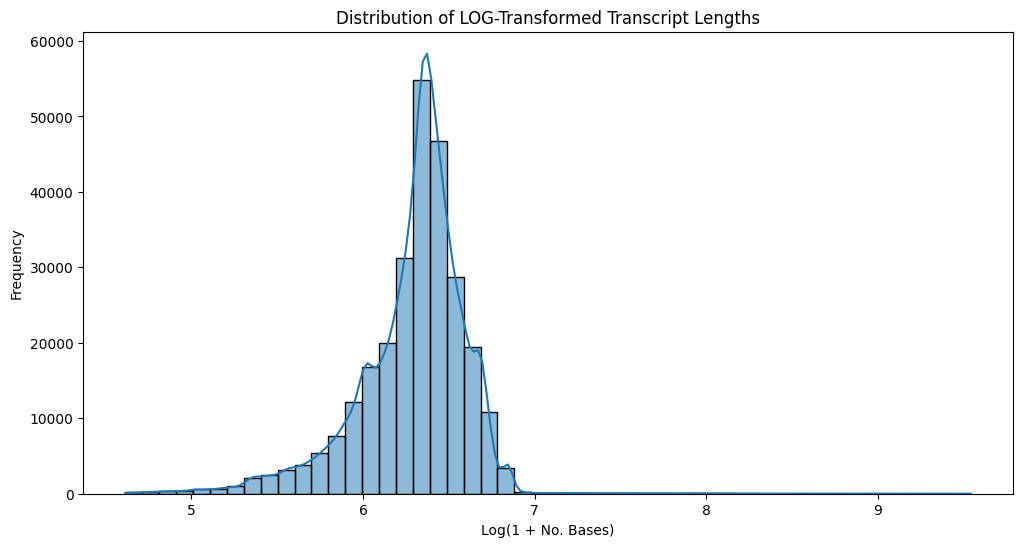

count    273103.000000
mean          6.288372
std           0.320553
min           4.615121
25%           6.152733
50%           6.347389
75%           6.475433
max           9.543091
Name: bases_log, dtype: float64

In [427]:
plt.figure(figsize=(12, 6))
sns.histplot(df['bases_log'], bins=50, kde=True)
plt.title('Distribution of LOG-Transformed Transcript Lengths')
plt.xlabel('Log(1 + No. Bases)')
plt.ylabel('Frequency')
plt.show()

df['bases_log'].describe()

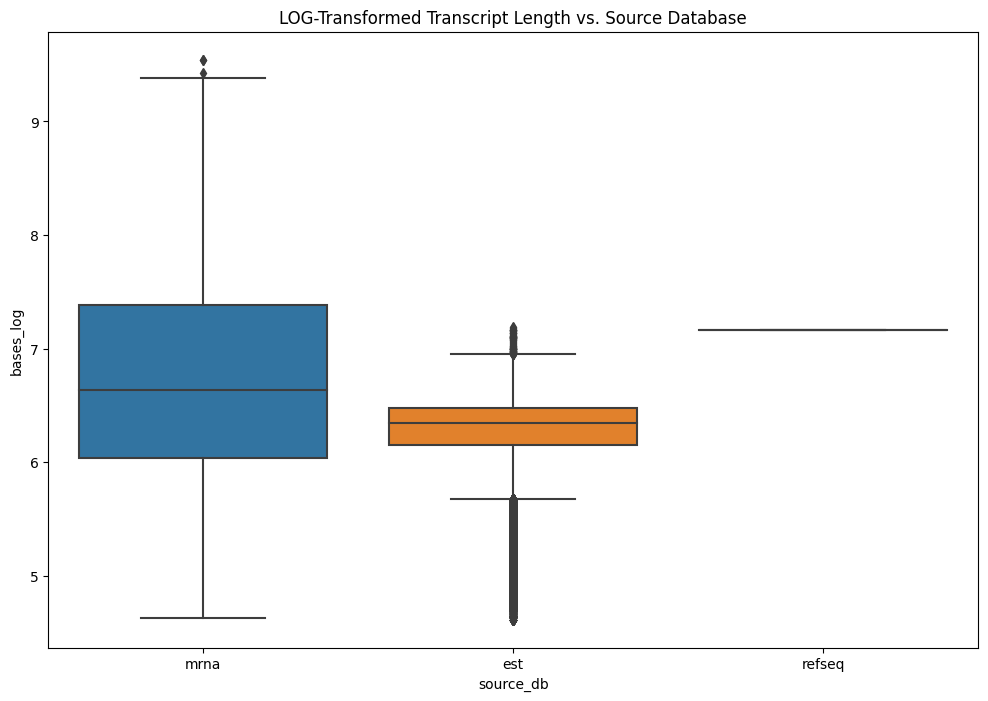

In [428]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='source_db', y='bases_log', data=df)
plt.title('LOG-Transformed Transcript Length vs. Source Database')
plt.show()

# LOG Transformed transcripts as well

In [429]:
df['transcripts'] = np.log1p(df['transcripts'])

Top 10 Genes with the Most Transcripts:
[6.24804287 6.41345896 5.45958551 6.97260625 7.21229447 6.08221891
 7.01211529 5.73009978 5.58349631 5.33753808]


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


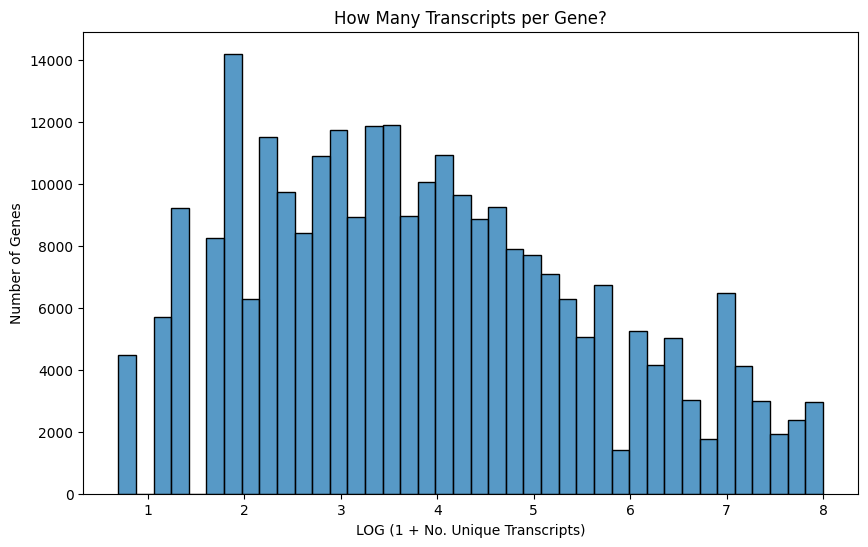

In [430]:
print("Top 10 Genes with the Most Transcripts:")
print(df['transcripts'].unique()[-1:-11:-1])

plt.figure(figsize=(10, 6))
sns.histplot(df['transcripts'], bins=40)
plt.title('How Many Transcripts per Gene?')
plt.xlabel('LOG (1 + No. Unique Transcripts)')
plt.ylabel('Number of Genes')
plt.show()

# Look for a proper predictand 

In [431]:
df[df['source_db']=='refseq']

,rna_accession,unigene_id,bases,source_db,transcripts,bases_log
325208,NM_001007131.1,Cfa.155,1286,refseq,3.688879,7.160069


In [432]:
df =df[df['source_db']!='refseq']

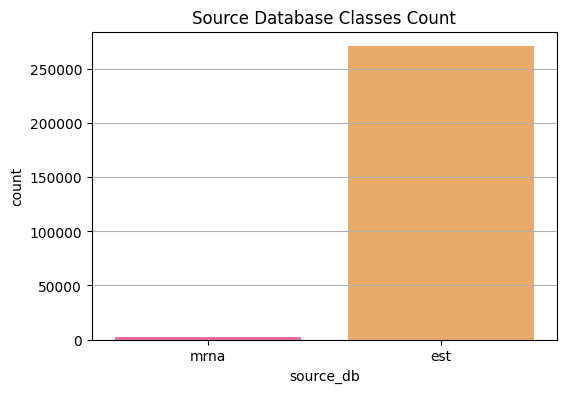

mrna = (%0.75796) totalling 2070
est = (%99.24204) totalling 271032


In [612]:
plt.figure(figsize=(6, 4))
sns.countplot(x='source_db', data=df, palette = 'spring')
plt.title('Source Database Classes Count')
plt.grid(axis='y')
plt.show()

tot = len(df['source_db'])
print(f"mrna = (%{len(df[df['source_db']=='mrna']['source_db'])/tot*100:0.5f}) totalling {len(df[df['source_db']=='mrna']['source_db'])}")
print(f"est = (%{len(df[df['source_db']=='est']['source_db'])/tot*100:0.5f}) totalling {len(df[df['source_db']=='est']['source_db'])}")

# Train the model

In [460]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix

In [461]:
df['target'] = df['source_db'].apply(lambda x: 0 if x == 'est' else 1)

### Attempt to undersample, as a baseline.

In [607]:
us = df.copy()
mrna = us[us['target']==0]
est = us[us['target']==1]
est_idx = np.random.choice(est.index,size=len(mrna['target']))
est = est.loc[est_idx]
tmp = pd.concat((mrna,est))
us = tmp
X = np.array(us['bases_log']).reshape(-1,1)
y = us['target']


train_X,  test_X,train_y, test_y = train_test_split(X,y,test_size=0.3)

In [608]:
model = LogisticRegression(class_weight = 'balanced',random_state = 37)

In [609]:
model.fit(train_X,train_y)

LogisticRegression(class_weight='balanced', random_state=37)

In [610]:

y_pred = model.predict(test_X)
print(f"Testing Accuracy : {accuracy_score(test_y,y_pred)*100:0.2f}%")

Testing Accuracy : 64.67%


Classification Report : 
              precision    recall  f1-score   support

           0       0.62      0.75      0.68     81394
           1       0.68      0.55      0.61     81226

    accuracy                           0.65    162620
   macro avg       0.65      0.65      0.64    162620
weighted avg       0.65      0.65      0.64    162620



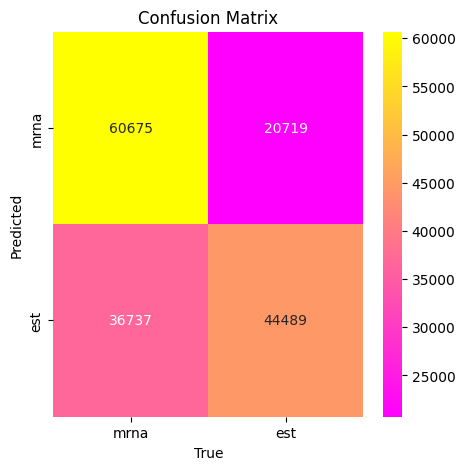

In [611]:
print(f"Classification Report : \n{classification_report(test_y,y_pred)}")

cm = confusion_matrix(test_y,y_pred)
plt.figure (figsize=(5,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='spring', xticklabels=['mrna', 'est'], yticklabels=['mrna', 'est'])
plt.ylabel('Predicted')
plt.xlabel('True')
plt.title('Confusion Matrix')
plt.show()


### It resulted in underfittng, so we'll trying to use class weight

In [603]:
X = np.array(df['bases_log']).reshape(-1,1)
y = df['target']


train_X,  test_X,train_y, test_y = train_test_split(X,y,test_size=0.3)

In [604]:
model = LogisticRegression(class_weight = 'balanced',random_state = 37)
model.fit(train_X,train_y)

LogisticRegression(class_weight='balanced', random_state=37)

In [605]:

y_pred = model.predict(test_X)
print(f"Testing Accuracy : {accuracy_score(test_y,y_pred)*100:0.2f}%")

Testing Accuracy : 73.82%


Classification Report : 
              precision    recall  f1-score   support

           0       1.00      0.74      0.85     81297
           1       0.02      0.56      0.03       634

    accuracy                           0.74     81931
   macro avg       0.51      0.65      0.44     81931
weighted avg       0.99      0.74      0.84     81931



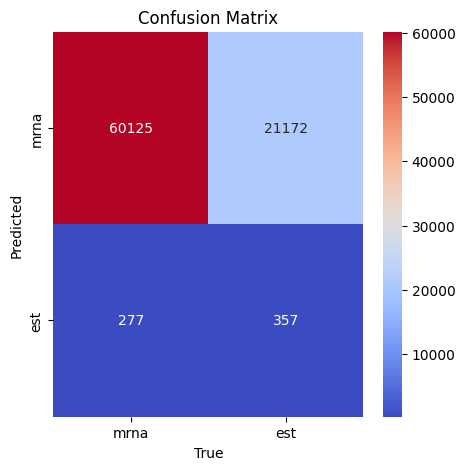

In [606]:
print(f"Classification Report : \n{classification_report(test_y,y_pred)}")

cm = confusion_matrix(test_y,y_pred)
plt.figure (figsize=(5,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm', xticklabels=['mrna', 'est'], yticklabels=['mrna', 'est'])
plt.ylabel('Predicted')
plt.xlabel('True')
plt.title('Confusion Matrix')
plt.show()


## It crying-wolfed,
### we'll be using another feature to assist, the pre-engineered transcripts feature.

In [597]:
X = df[['bases_log','transcripts']]
y = df['target']

train_X,  test_X,train_y, test_y = train_test_split(X,y,test_size=0.3)

In [598]:
model = LogisticRegression(class_weight = 'balanced',random_state = 37)
model.fit(train_X,train_y)

LogisticRegression(class_weight='balanced', random_state=37)

In [599]:
y_pred = model.predict(test_X)
print(f"Testing Accuracy : {accuracy_score(test_y,y_pred)*100:0.2f}%")

Testing Accuracy : 71.37%


Classification Report : 
              precision    recall  f1-score   support

           0       1.00      0.71      0.83     81327
           1       0.02      0.80      0.04       604

    accuracy                           0.71     81931
   macro avg       0.51      0.76      0.44     81931
weighted avg       0.99      0.71      0.83     81931



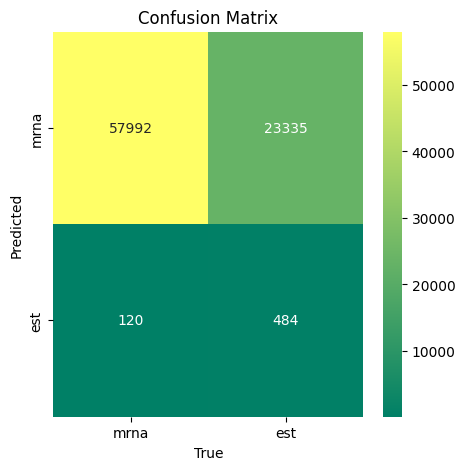

In [600]:
print(f"Classification Report : \n{classification_report(test_y,y_pred)}")

cm = confusion_matrix(test_y,y_pred)
plt.figure (figsize=(5,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='summer', xticklabels=['mrna', 'est'], yticklabels=['mrna', 'est'])
plt.ylabel('Predicted')
plt.xlabel('True')
plt.title('Confusion Matrix')
plt.show()


In [575]:
import xgboost as xgb

In [583]:
X = df[['bases_log','transcripts']]
y = df['target']

train_X,  test_X,train_y, test_y = train_test_split(X,y,test_size=0.3)

In [584]:
neg = df[df['target'] == 0].shape[0]
pos = df[df['target'] == 1].shape[0]

scale = neg/pos

model = xgb.XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',
    use_label_encoder=False,
    scale_pos_weight = scale,
    random_state = 37
)

In [585]:
model.fit(train_X,train_y)
y_pred = model.predict(test_X)

In [586]:
y_pred = model.predict(test_X)
print(f"Testing Accuracy : {accuracy_score(test_y,y_pred)*100:0.2f}%")

Testing Accuracy : 94.01%


Classification Report : 
              precision    recall  f1-score   support

           0       1.00      0.94      0.97     81310
           1       0.09      0.74      0.16       621

    accuracy                           0.94     81931
   macro avg       0.54      0.84      0.56     81931
weighted avg       0.99      0.94      0.96     81931



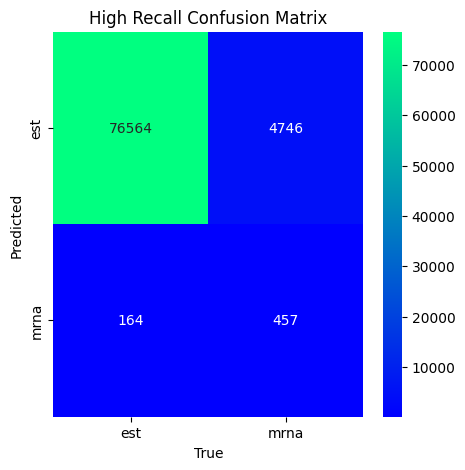

In [587]:
print(f"Classification Report : \n{classification_report(test_y,y_pred)}")

cm = confusion_matrix(test_y,y_pred)
plt.figure (figsize=(5,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='winter', xticklabels=['est', 'mrna'], yticklabels=['est', 'mrna'])
plt.ylabel('Predicted')
plt.xlabel('True')
plt.title('High Recall Confusion Matrix')
plt.show()


# Precision-Recall trade-off:
### 1-  if we want high precision,we increase confidence threshold to decrease the number times we're wrong about the rare class. 
### 2-  if we want high recall, the previous one high recall (75%) is great because we aren't missing many of the rare 'mrna' sequences. 

In [588]:
y_prob = model.predict_proba(test_X)[:, 1]
threshold = 0.99
y_thres = [1 if prob >= threshold else 0 for prob in y_prob]


Classification Report : 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     81310
           1       0.77      0.48      0.59       621

    accuracy                           0.99     81931
   macro avg       0.88      0.74      0.79     81931
weighted avg       0.99      0.99      0.99     81931



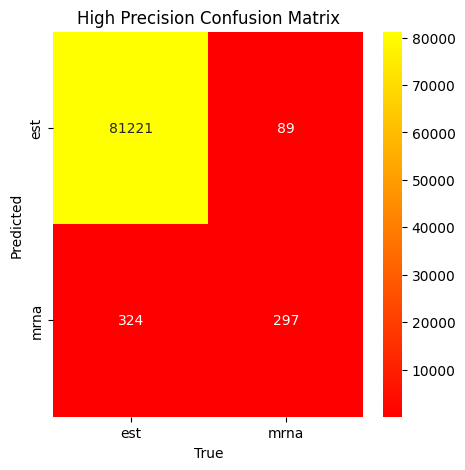

In [589]:
print(f"Classification Report : \n{classification_report(test_y,y_thres)}")

cm = confusion_matrix(test_y,y_thres)
plt.figure (figsize=(5,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='autumn', xticklabels=['est', 'mrna'], yticklabels=['est', 'mrna'])
plt.ylabel('Predicted')
plt.xlabel('True')
plt.title('High Precision Confusion Matrix')
plt.show()


## 3- If we want something in between (Not recommend for Biologists); we can hyperparameter-tune:
* ## F1
* ## Threshold
* ## max_depth
* ## n_estimators
* ## learning_rate

In [548]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, f1_score

In [569]:
model2 = xgb.XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',
    #scale_pos_weight=scale, 
    random_state=42
)

param = {
    'max_depth': [3, 5, 7],
    'n_estimators': [100, 200],
    'learning_rate': [0.1, 0.01],
    'scale_pos_weight': [123]
}


gs = GridSearchCV(
    estimator=model2,
    param_grid=param,
    cv=5,
    verbose=1,
)


gs.fit(X, y)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=42, ...),
             param_grid={'learning_rate': [0.1, 0.01], 'max_depth': [3, 5, 7],
                         'n_estimators': [100, 200],
                         'scale_pos_weight': [123]},
             verbose=1)

In [590]:
model = gs.best_estimator_
gs.best_params_

{'learning_rate': 0.1,
 'max_depth': 7,
 'n_estimators': 200,
 'scale_pos_weight': 123}

In [591]:
y_pred_probs = model.predict_proba(test_X)[:, 1]

f1 = 0
thr = 0
for th in [i/100 for i in range(10, 100)]: 
    y_pred = (y_pred_probs > th).astype(int)
    cur_f1 = f1_score(test_y, y_pred, pos_label=1)
    if cur_f1 > f1:
        f1 = cur_f1
        thr = th

print(f"Testing Accuracy : {accuracy_score(test_y,y_pred)*100:0.2f}%")

Testing Accuracy : 99.51%


Classification Report : 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     81310
           1       0.81      0.46      0.59       621

    accuracy                           1.00     81931
   macro avg       0.90      0.73      0.79     81931
weighted avg       0.99      1.00      0.99     81931



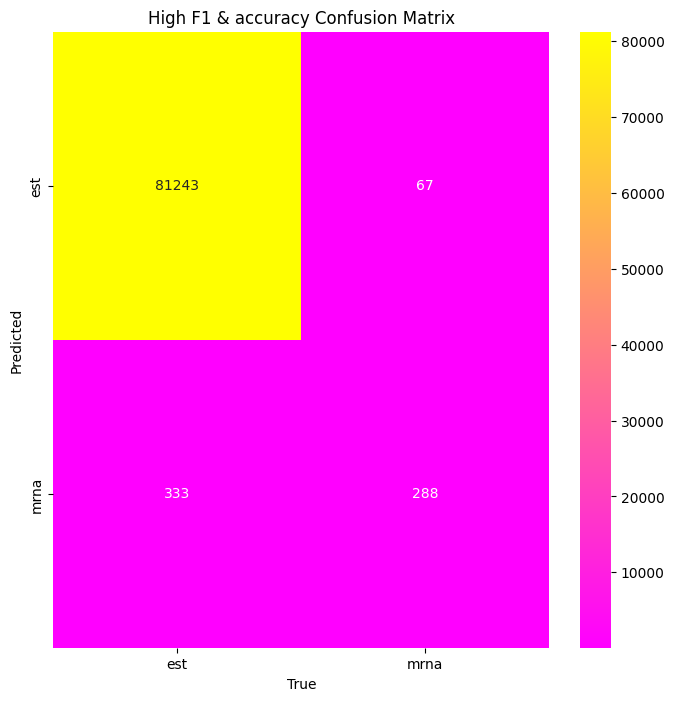

In [593]:
print(f"Classification Report : \n{classification_report(test_y,y_pred)}")

cm = confusion_matrix(test_y,y_pred)
plt.figure (figsize=(8,8))
sns.heatmap(cm, annot=True, fmt='d', cmap='spring', xticklabels=['est', 'mrna'], yticklabels=['est', 'mrna'])
plt.ylabel('Predicted')
plt.xlabel('True')
plt.title('High F1 & accuracy Confusion Matrix')
plt.show()
